In [ ]:
#Connect drive with collab
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#import libary
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
#import data set
data= pd.read_csv('/content/sample_data/Leads.csv')

##**Analysing the data set**

In [ ]:
data.shape

(9240, 37)

In [ ]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##**Checking Duplicate Values**

In [ ]:
data.duplicated(subset = ['Prospect ID'], keep = False).sum()

0

In [ ]:
data.duplicated(subset = ['Lead Number'], keep = False).sum()

0

In [ ]:
data.loc[data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


##**Data Cleaning**


In [ ]:
#Dropping the Prospect ID and retaining Lead Number for linking with Lead Score(0-100).
#This will be seperated from train/test dataset during model training
data.drop(['Prospect ID'], axis=1, inplace = True)

In [ ]:
#replace select value to nan
data = data.replace('Select', np.nan)

In [ ]:
data.nunique()

,0
Lead Number,9240
Lead Origin,5
Lead Source,21
Do Not Email,2
Do Not Call,2
Converted,2
TotalVisits,41
Total Time Spent on Website,1731
Page Views Per Visit,114
Last Activity,17


In [ ]:
#drop columns having only 1 value as they do not have any analytical value
data= data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [ ]:
#checking null value again
data.isnull().sum()

,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137
Last Activity,103


In [ ]:
# % null value
round(100*(data.isnull().sum())/len(data.index),2)

,0
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48
Last Activity,1.11


In [ ]:
# drop column which have more then 45% null value
data = data.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Profile','Lead Quality','How did you hear about X Education',],axis =1)

In [ ]:
data.shape

(9240, 24)

In [ ]:
#checking null value %
round(100*(data.isnull().sum()/len(data.index)), 2)

,0
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48
Last Activity,1.11


In [ ]:
#if we again drop null values,a lot of important columns will be lost so we just replace nan to "not provided"
data['Specialization'] = data['Specialization'].fillna('not provided')
data['City'] = data['City'].fillna('not provided')
data['Tags'] = data['Tags'].fillna('not provided')
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].fillna('not provided')
data['What is your current occupation'] = data['What is your current occupation'].fillna('not provided')
data['Country'] = data['Country'].fillna('not provided')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [ ]:
#check null value percentage
round(100*(data.isnull().sum()/len(data.index)), 2)

,0
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48
Last Activity,1.11


In [ ]:
#Country column analysis
data['Country'].value_counts()

,count
Country,
India,6492
not provided,2461
United States,69
United Arab Emirates,53
Singapore,24
Saudi Arabia,21
United Kingdom,15
Australia,13
Qatar,10


In [ ]:
#Instead of individual countries, using buckets for the country column
def buckets(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "Outside india"
    return category

data['Country'] = data.apply(lambda x:buckets(x['Country']), axis = 1)
data['Country'].value_counts()

,count
Country,
India,6492
not provided,2461
Outside india,287


In [ ]:
#replacing missing values in a dataset with "India" because it's the most common non-missing value.
data['Country'] = data['Country'].replace('not provided','India')
data['Country'].value_counts()

,count
Country,
India,8953
Outside india,287


In [ ]:
# Checking the percent of loss if the null values are removed
round(100*(sum(data.isnull().sum(axis=1) > 1)/data.shape[0]),2)

1.48

In [ ]:
data = data[data.isnull().sum(axis=1) <1]

In [ ]:
#check the null value %
round(100*(data.isnull().sum()/len(data.index)), 2)

,0
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,0.0
Total Time Spent on Website,0.0
Page Views Per Visit,0.0
Last Activity,0.0


##**Exploratory Data Analysis**


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 non-n

###**Univariate Analysis**


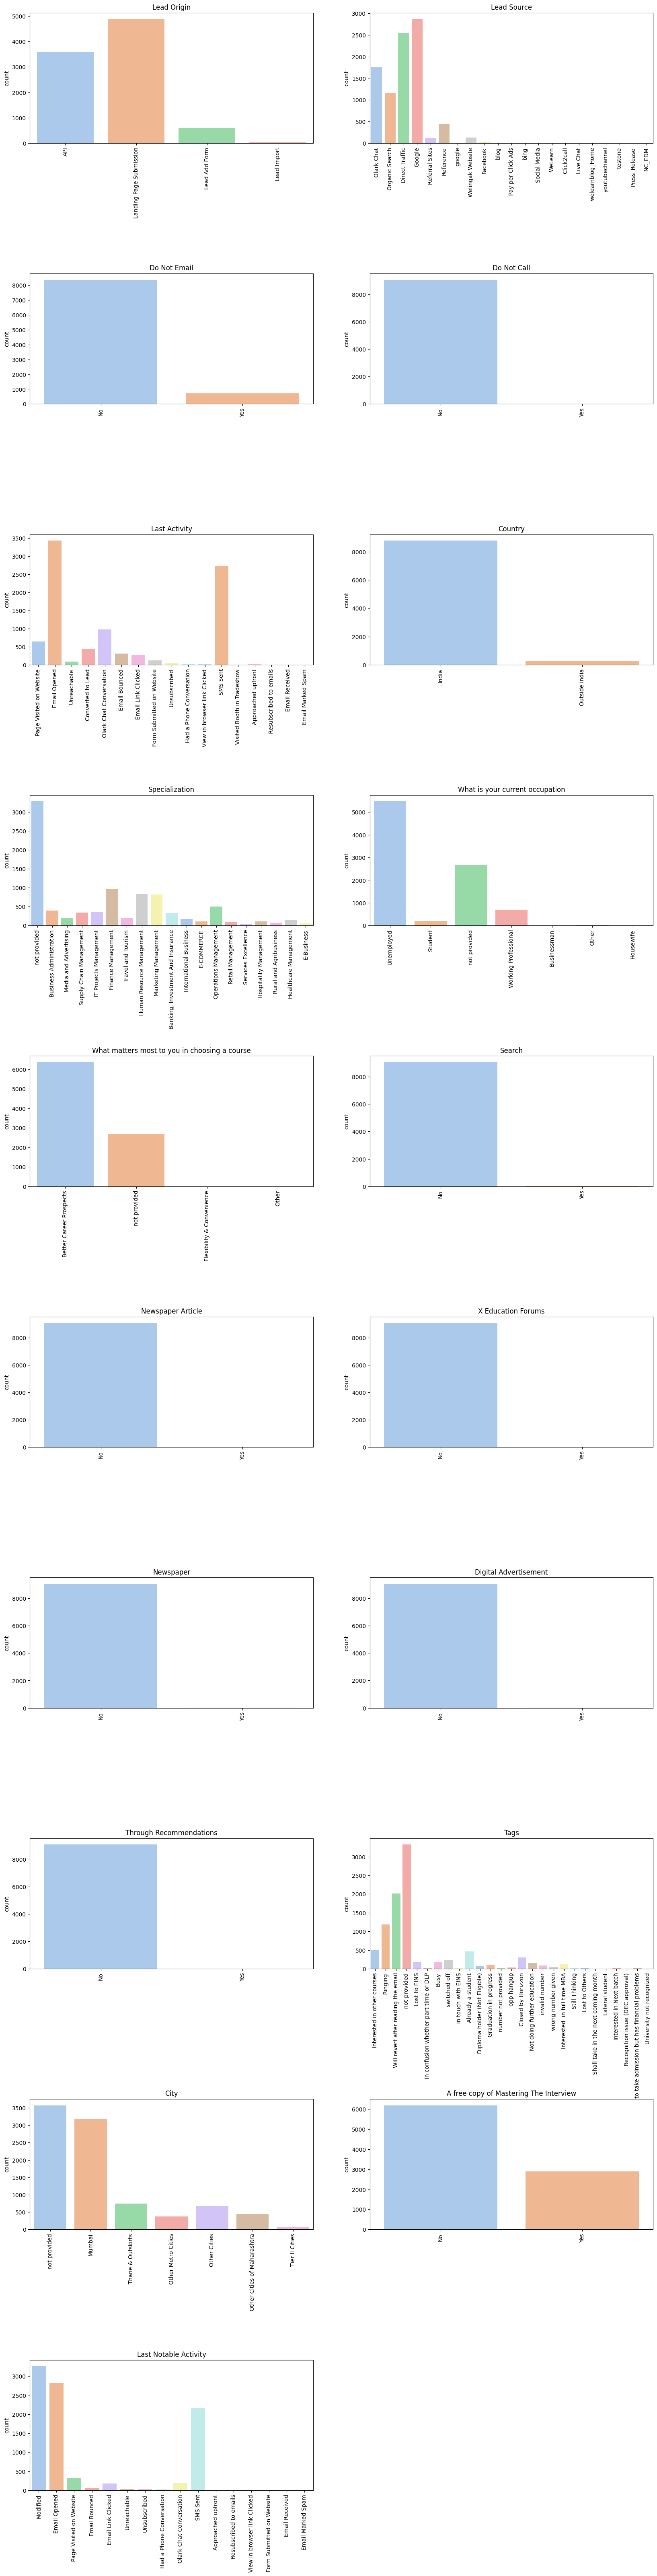

In [ ]:
#Plot Count of all object type columns values
plt.figure(figsize=(20,80))
for i,col in enumerate(data.select_dtypes('object').columns):
  plt.subplot(10,2,i+1)
  sns.countplot(x=col,data=data,palette="pastel")
  plt.title(col)
  plt.xticks(rotation=90)
  plt.xlabel('')

plt.subplots_adjust(hspace=1.0)
plt.show()


Most of the leads are Indian in origin.They seem to have mostly come through the landing page submission with source as google. Customers have either modified their submission or opened up an email as last activity. Most city information is not present but Mumbai comes a close second. Most people take time to read through the email (Tags column). Most leads are fresh (not through recommendations). Most customers don't seem to have seen the ad in any of the channels (search, magazine, digital etc). Most leads are unemployed with carrer prospects as the primary reason for choosing the course (no specialization provided). So we can assume that they are students/freshers looking for carrer enhancement. Almost all have do not disturb (no call, no email).

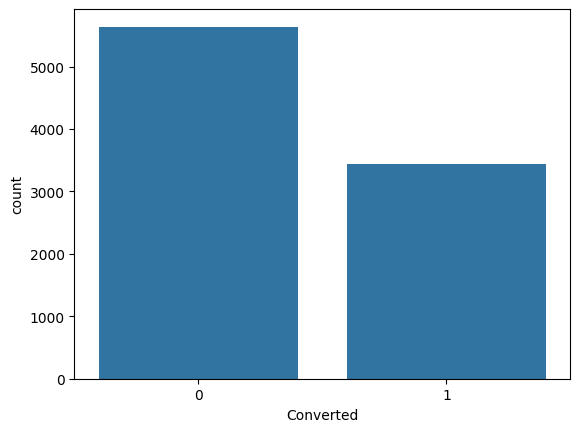

In [ ]:
#Countplot of Converted variable
sns.countplot(x='Converted', data=data)
plt.show()

**Here we seem to have both the classes represented decently and there is no major class imbalance**

###**Bivariate Analysis**
Relating categorical variables to country column

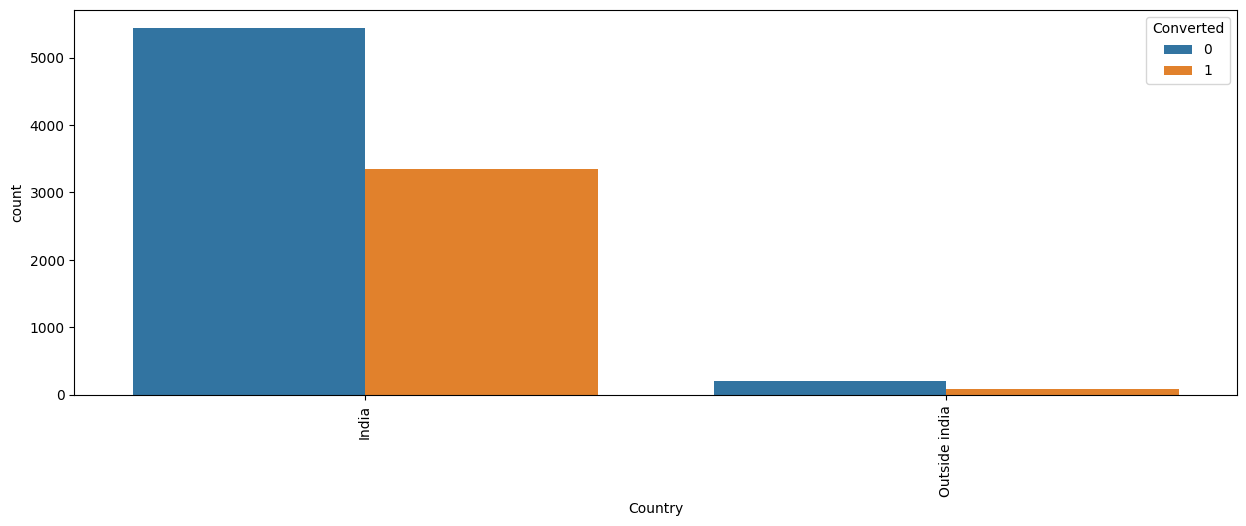

In [ ]:
#plotting spread of Country columnn
plt.figure(figsize=(15,5))
s1=sns.countplot(x='Country', hue='Converted' , data=data)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

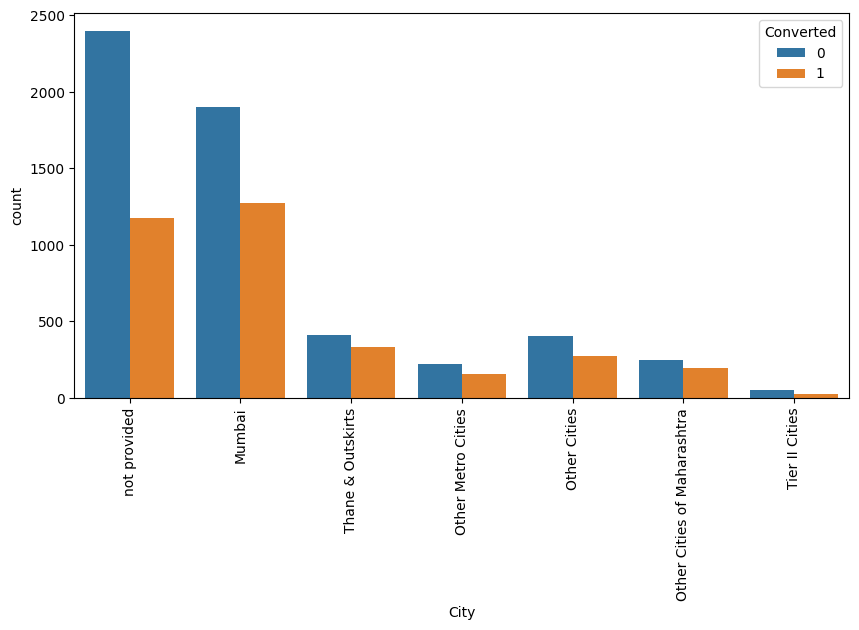

In [ ]:
#plotting spread of City columnn
plt.figure(figsize=(10,5))
s1=sns.countplot(x='City', hue='Converted',data=data)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

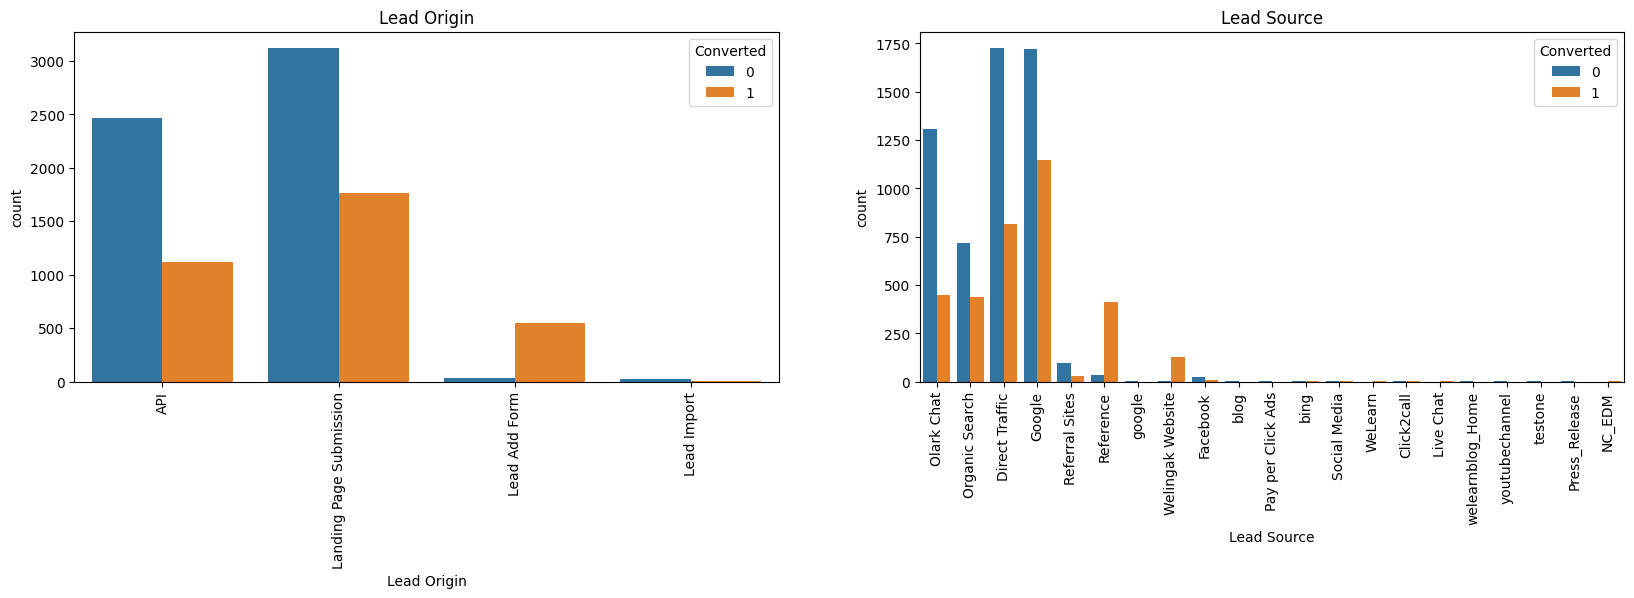

In [ ]:
plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

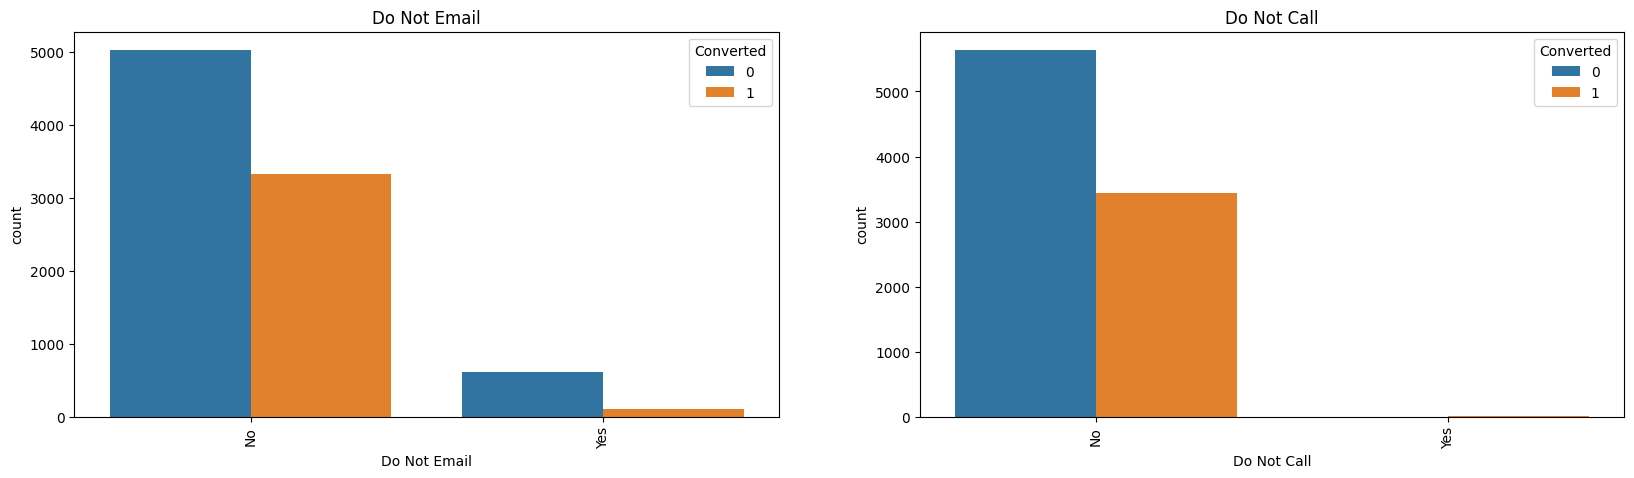

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

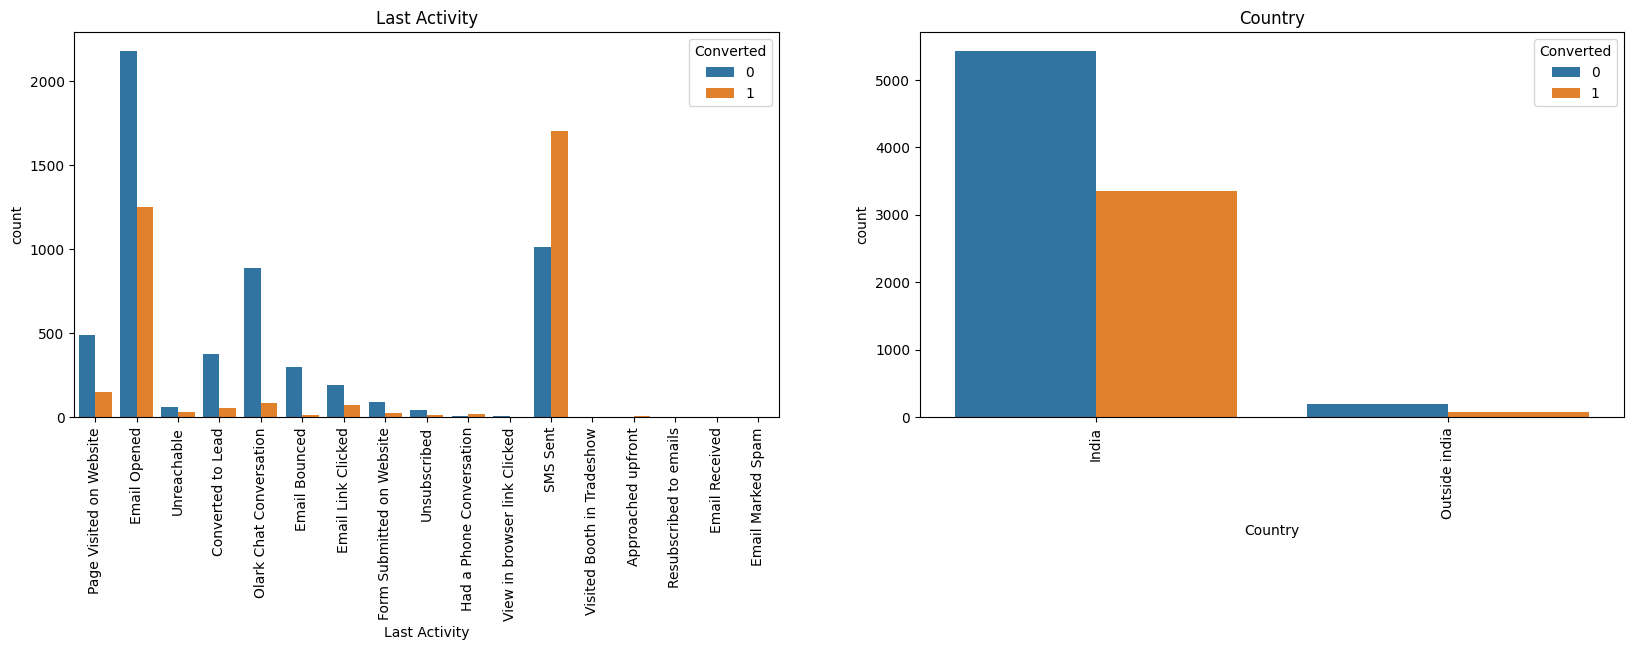

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

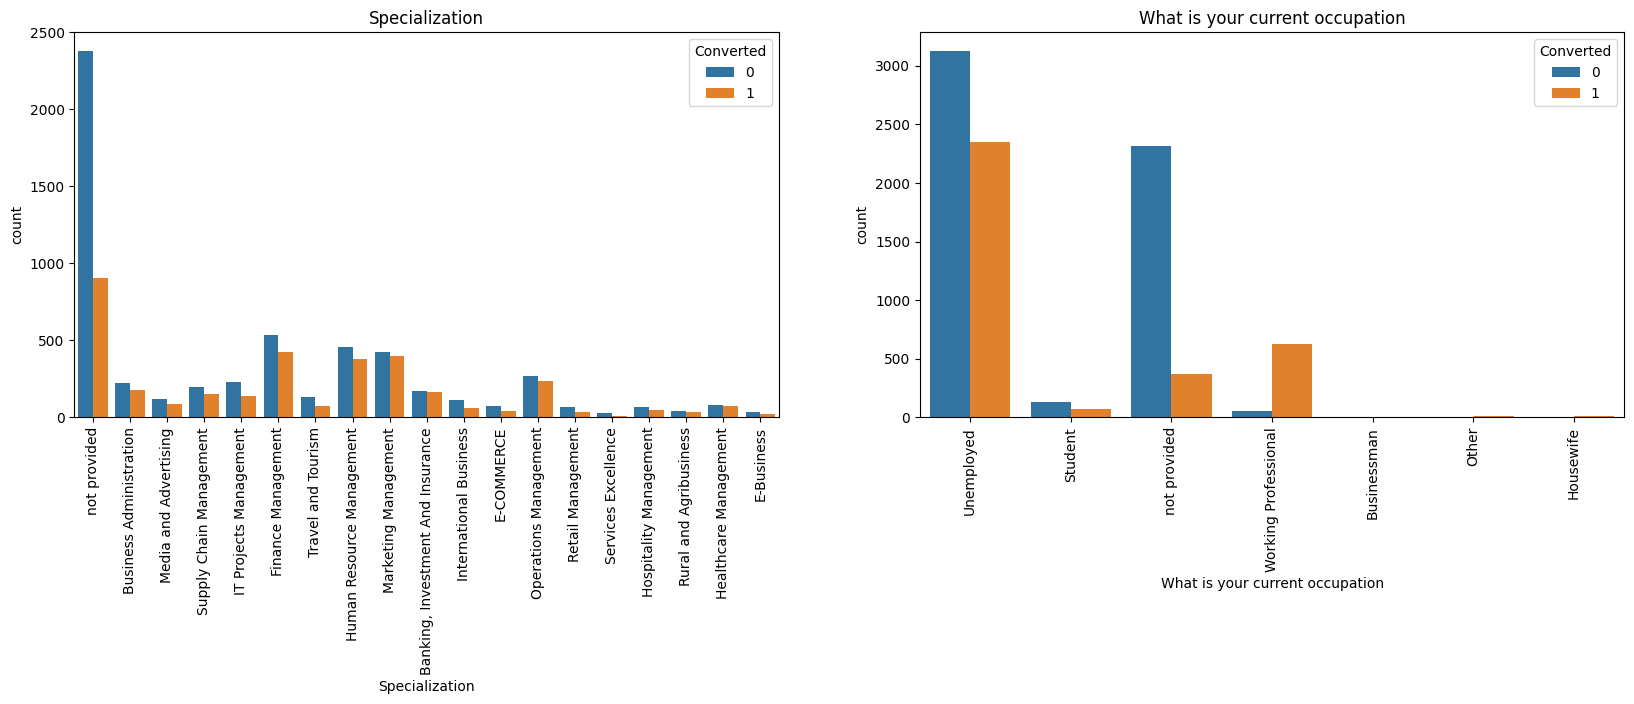

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

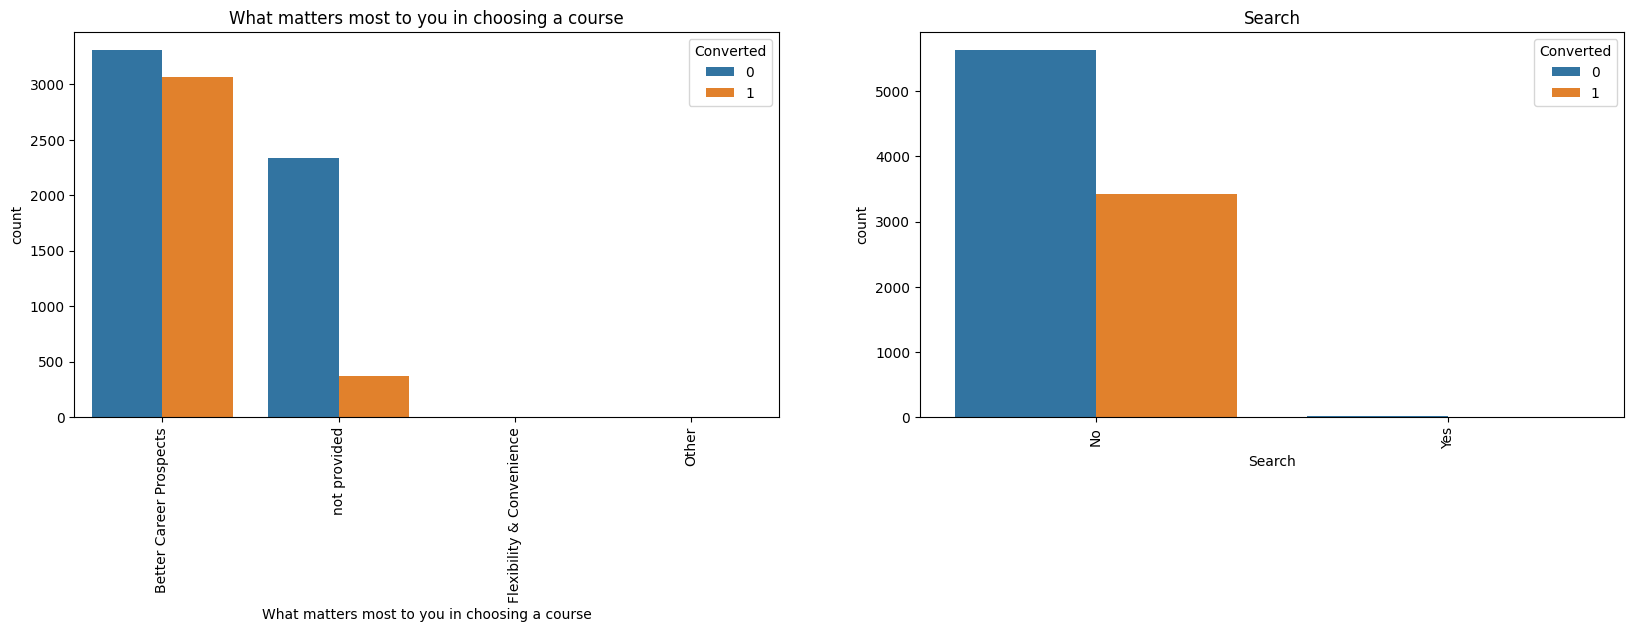

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

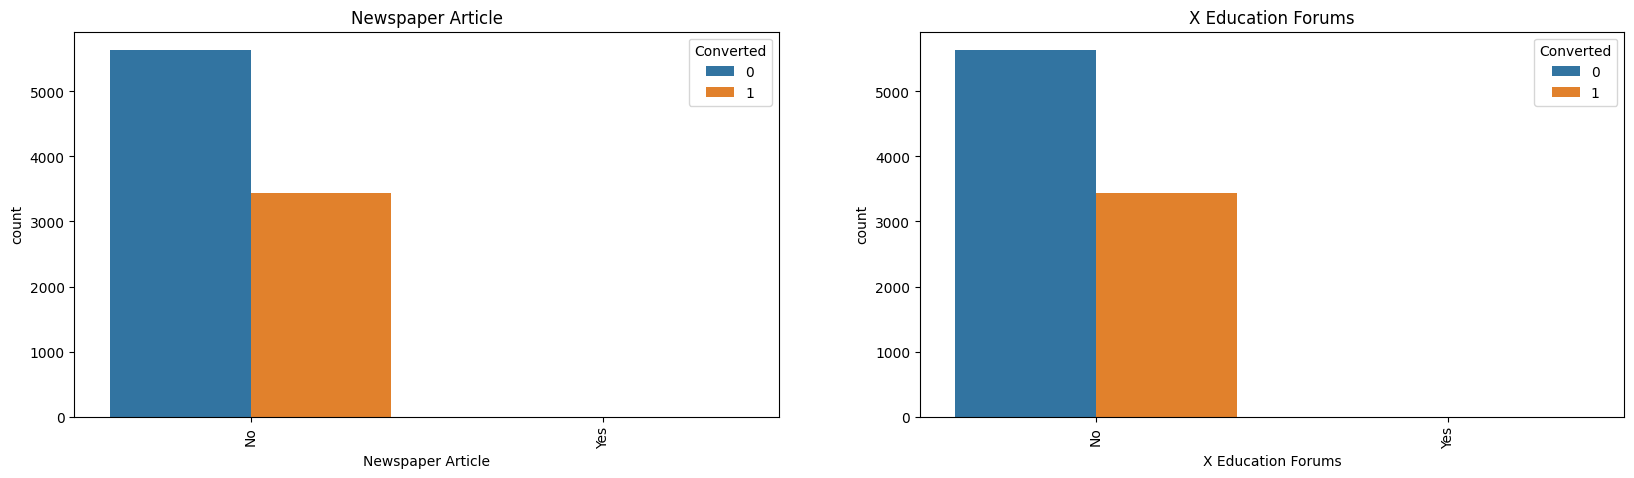

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

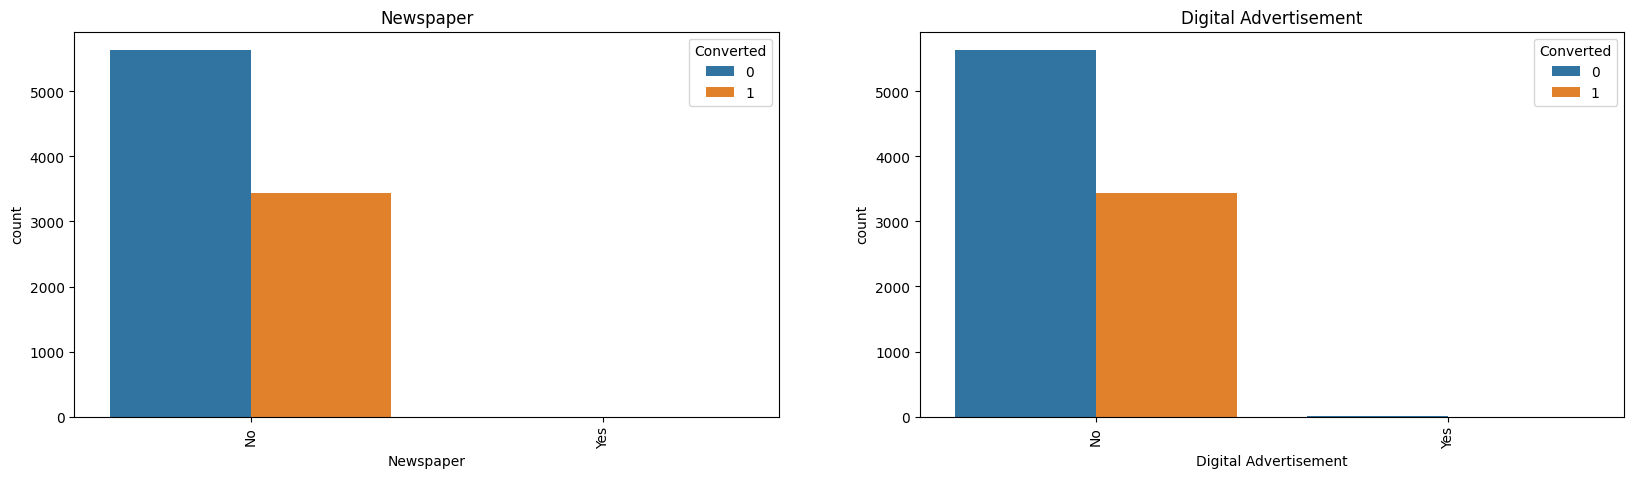

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

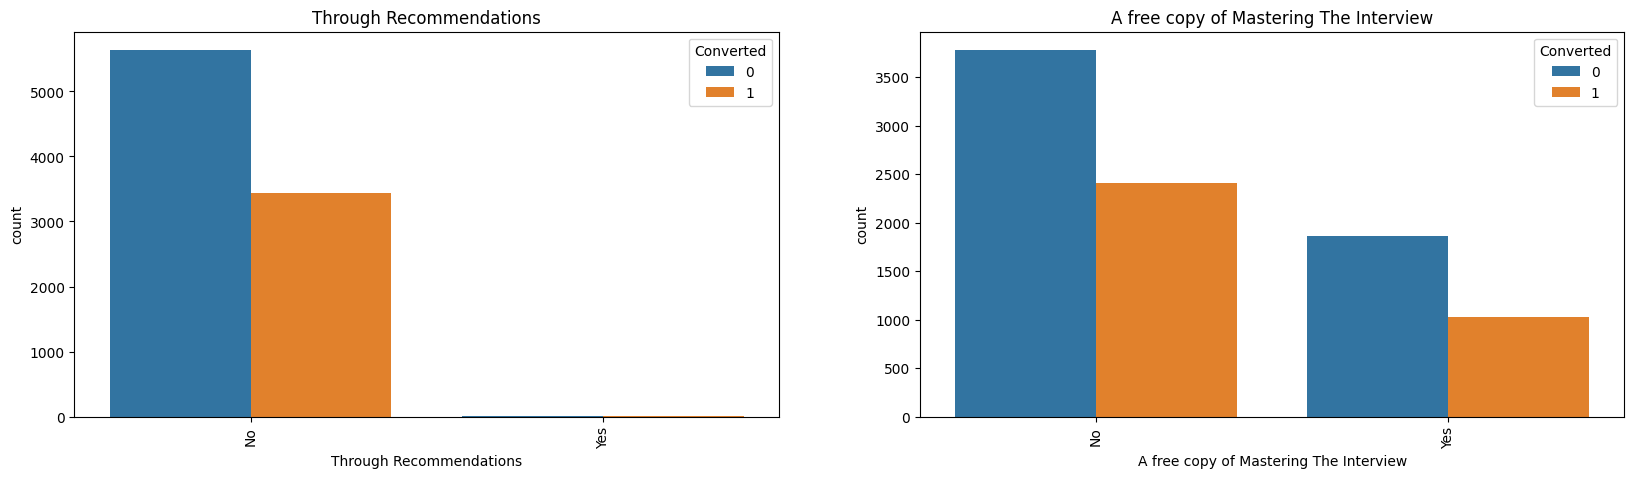

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

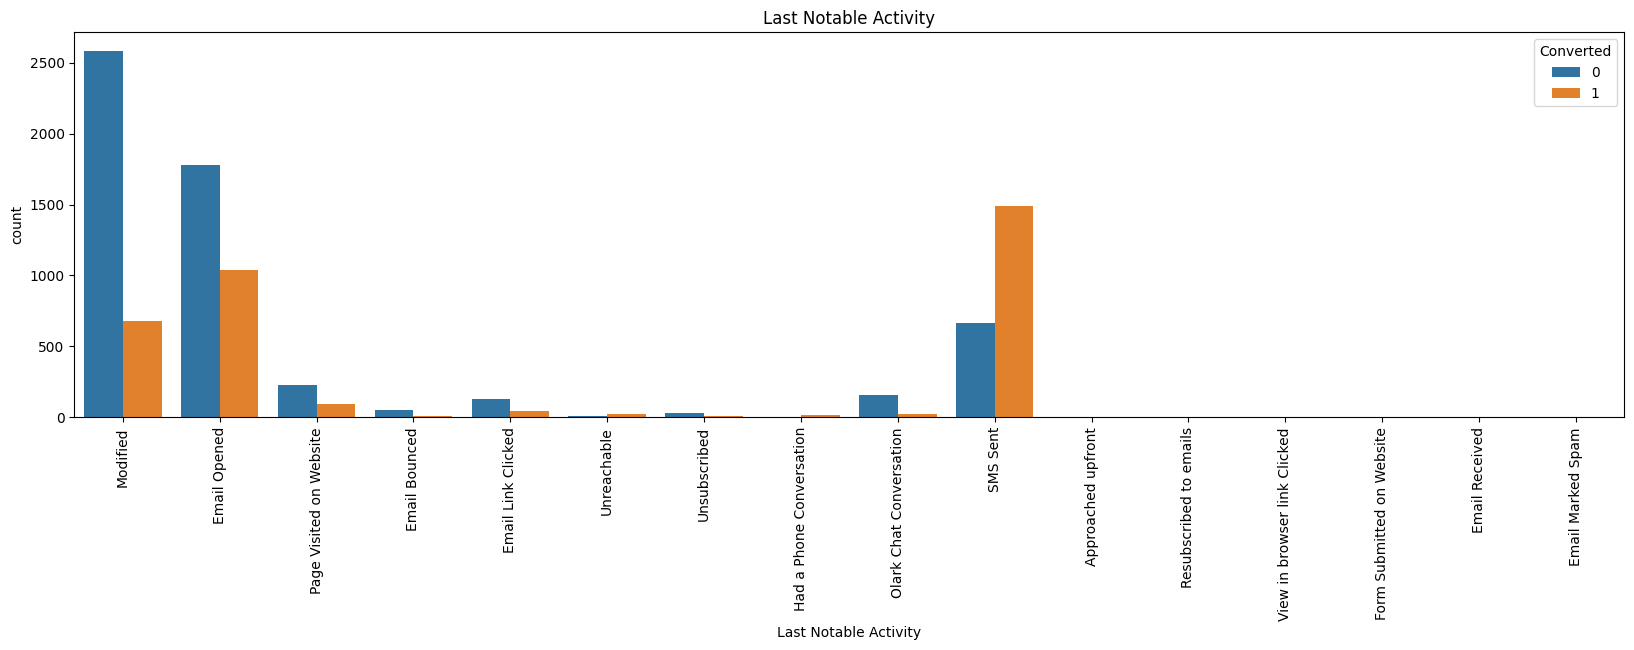

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot(x='Last Notable Activity', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

The conversions mostly align with the maxima label of the categorical variable with one notable exception. There seems to be more conversions via SMS rather than the email.

###**Multivariate Analysis for Numerical Variables**

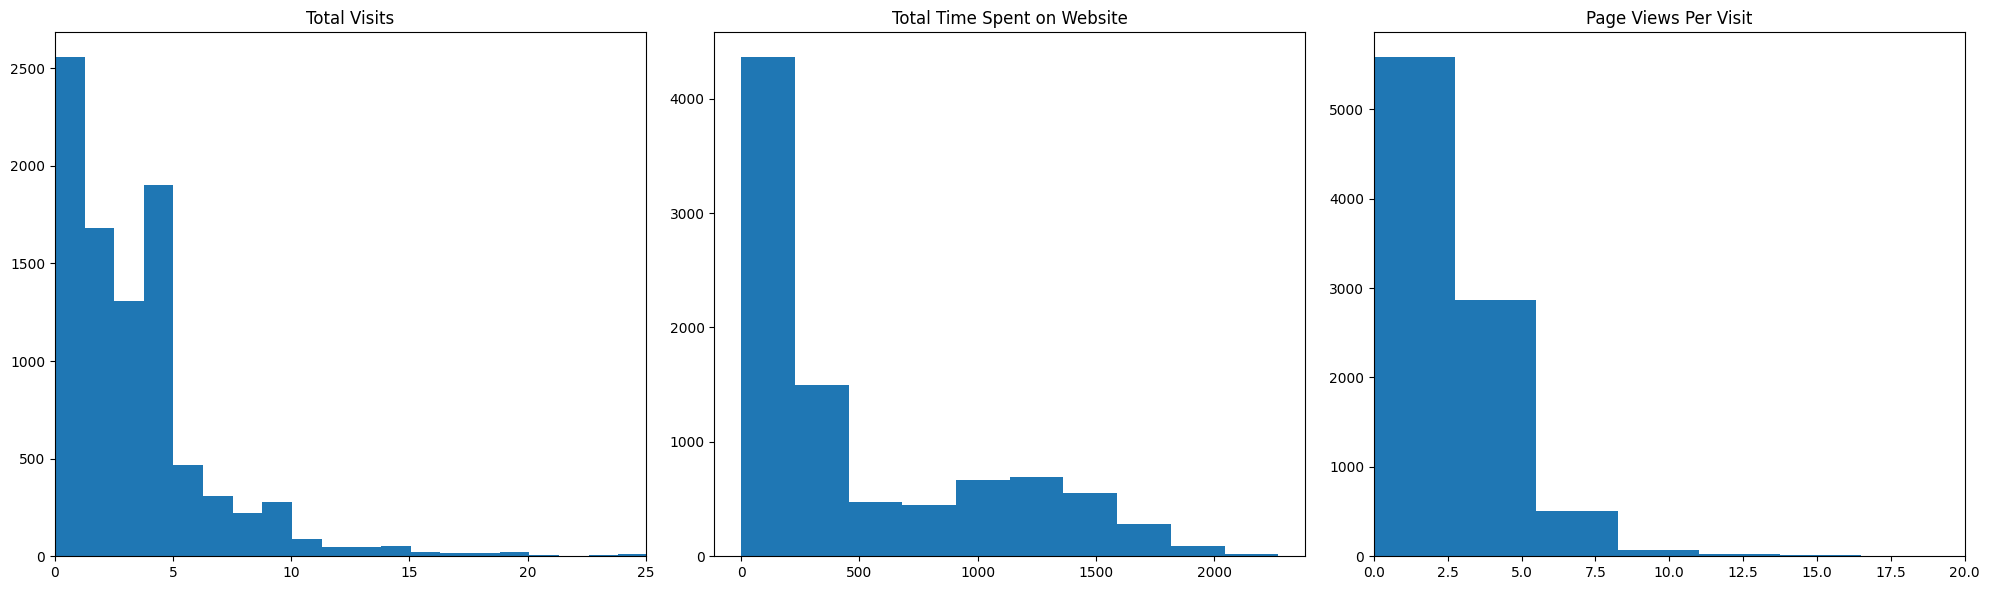

In [ ]:
# Data and plot settings
columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
bins = [200, 10, 20]
xlims = [(0, 25), None, (0, 20)]
titles = ['Total Visits', 'Total Time Spent on Website', 'Page Views Per Visit']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, col in enumerate(columns):
    axes[i].hist(data[col], bins=bins[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlim(xlims[i])

plt.tight_layout()
plt.show()

Based on the data we can see that the majority of the users tend to spend a lot less time on the website. Also the visits and content browsed are towards the lower end of the spectrum.

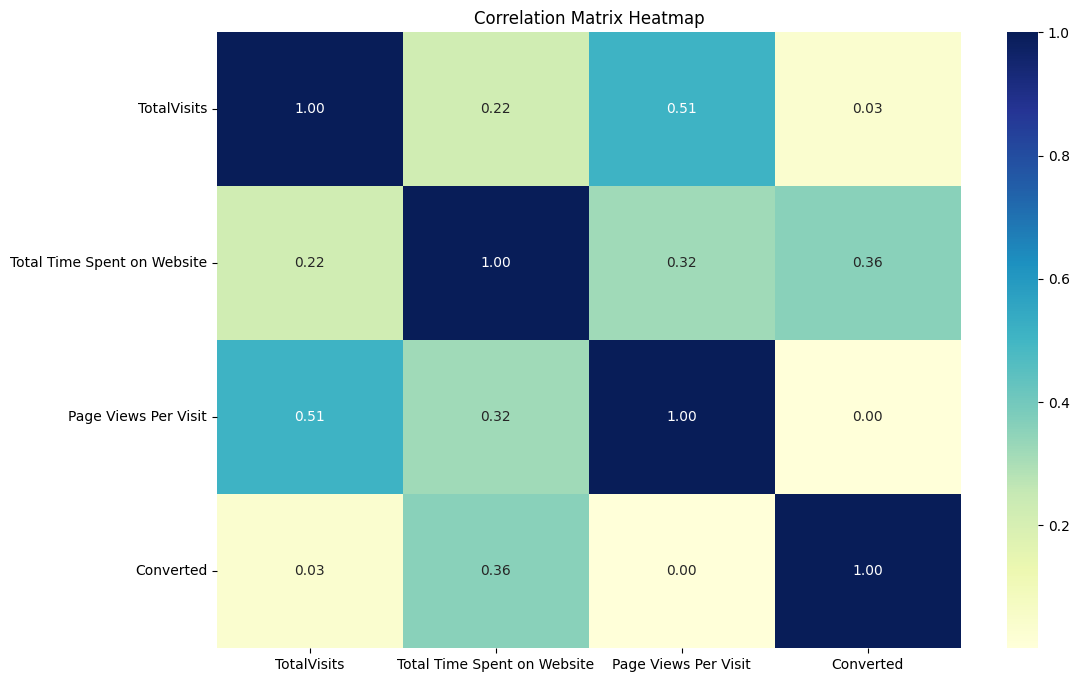

In [ ]:
#Checking Correlation between different numeric variables
plt.figure(figsize=(12, 8))
numeric_data = data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit','Converted']]
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

Those spending more time on the the website are most likely to convert. Also as expected total visits and page view per visits are highly correlated.

<Figure size 1200x600 with 0 Axes>

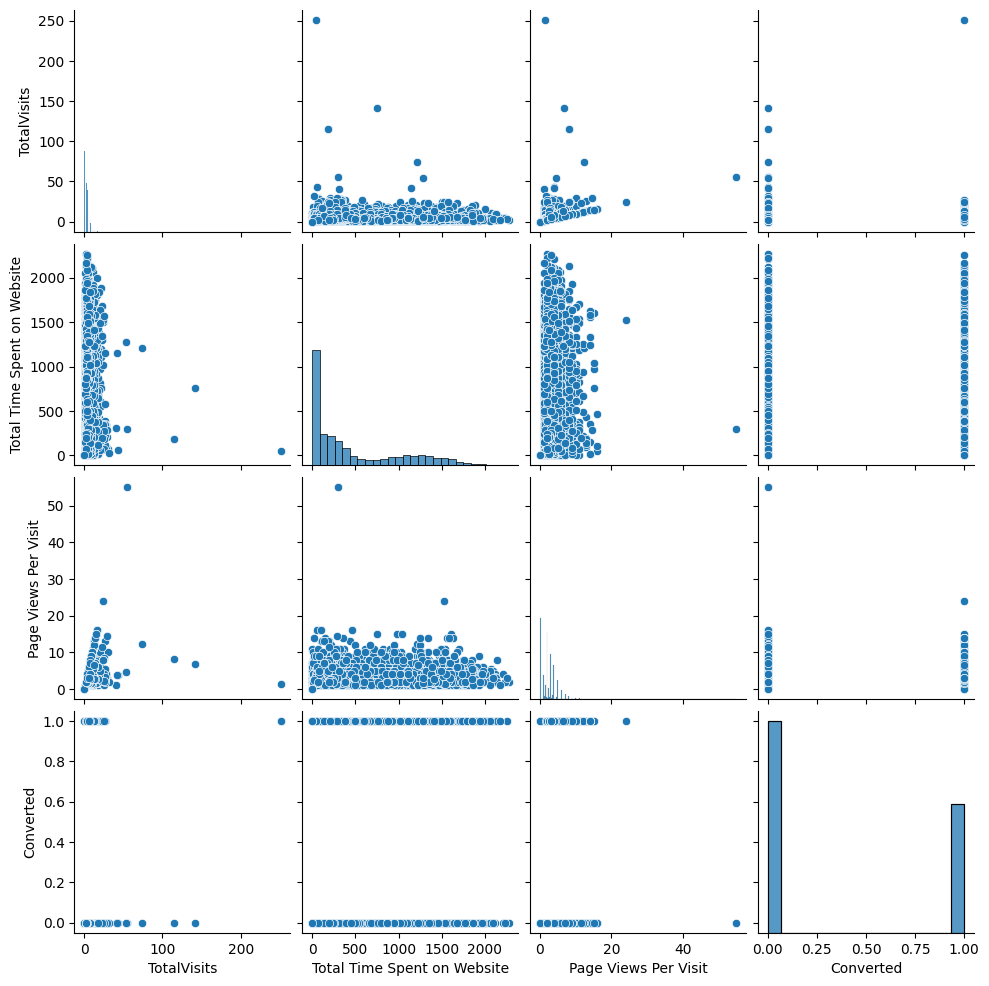

In [ ]:
# Visualizing Numeric variables
plt.figure(figsize = (12,6))
sns.pairplot(data=data,vars=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit','Converted'])
plt.show()

##**Outlier detection**

In [ ]:
numeric = data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


Based on the data provided, we can identify potential outliers by examining the maximum values compared to the upper percentiles (e.g., 90% and 99%). Here all the three columns have their max significantly greater than the upper percentiles. So all will be treated for outliers.

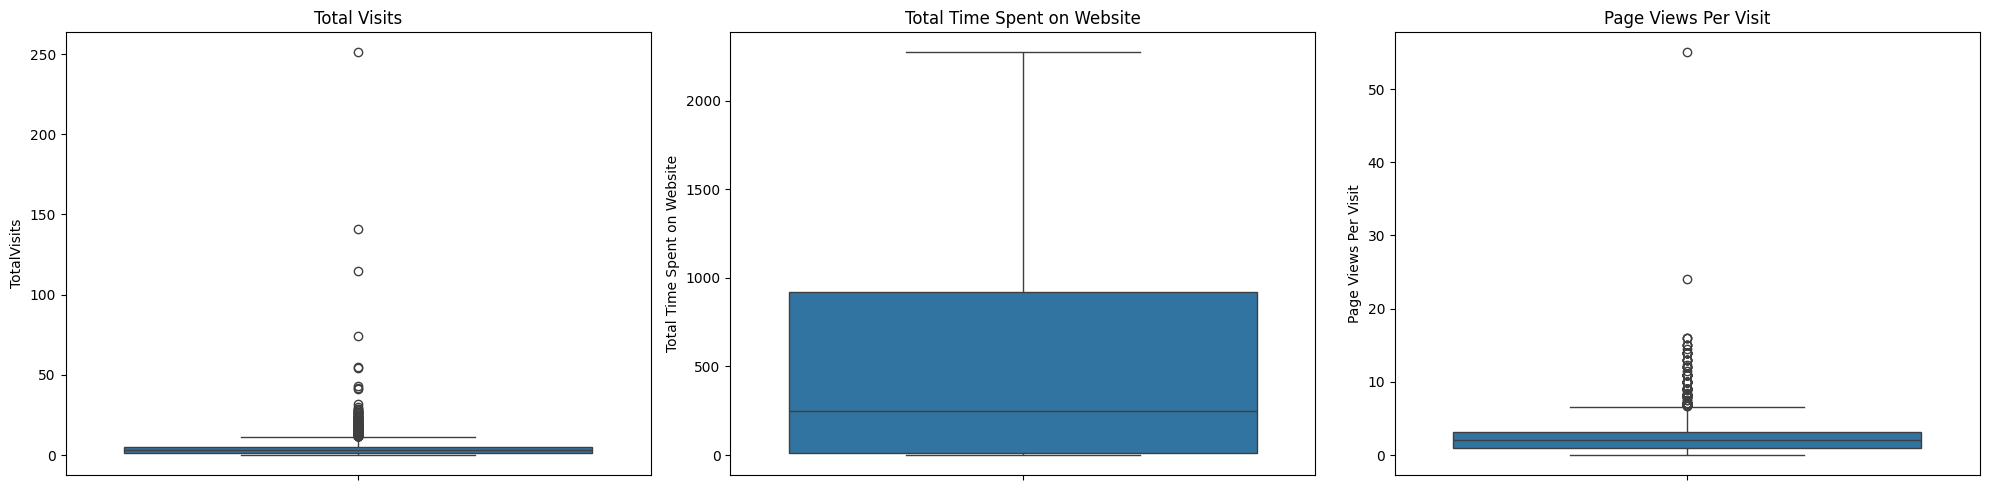

In [ ]:
# Data and plot settings
columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
titles = ['Total Visits', 'Total Time Spent on Website', 'Page Views Per Visit']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, col in enumerate(columns):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()


In [ ]:
#Removing outliers from the relevant columns by dropping rows where cols are out of the IQR range(q1-1.5*IQR,q3+1.5IQR)
list_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for column in list_cols:
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3-Q1
  final_data=data[(data[column] >= Q1-1.5*IQR) & (data[column] <= Q3+1.5*IQR)]

print(len(final_data))

8728


In [ ]:
# Remaining % rows
round((100 - 100*(len(final_data)/9240)),2)
# As seen below we only lost about 6% of the overall data post handling missing data and outlier removal.

5.54

#**Feature Engineering**


###**Dummy variable creation**

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8728 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    8728 non-null   int64  
 1   Lead Origin                                    8728 non-null   object 
 2   Lead Source                                    8728 non-null   object 
 3   Do Not Email                                   8728 non-null   object 
 4   Do Not Call                                    8728 non-null   object 
 5   Converted                                      8728 non-null   int64  
 6   TotalVisits                                    8728 non-null   float64
 7   Total Time Spent on Website                    8728 non-null   int64  
 8   Page Views Per Visit                           8728 non-null   float64
 9   Last Activity                                  8728 non-n

In [ ]:
#Get a list of all the categorical variables
cat_vars = final_data.select_dtypes(include='object').columns
cat_vars

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
#Creating Dummy variables
dummy_vars = pd.get_dummies(final_data[cat_vars], drop_first=True,dtype='int')
#Merge dummy_vars with final_data
model_dataset = pd.concat([final_data, dummy_vars], axis=1)
model_dataset.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
#Dropping the categorical variables from model_df
model_dataset.drop(cat_vars, axis=1, inplace=True)
model_dataset.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


##**Test-Train Split**

In [ ]:
X=model_dataset.drop(['Converted'],axis=1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
y=model_dataset['Converted']
y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [ ]:
#Dataset Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [ ]:
X_train_LeadId = X_train.pop('Lead Number')
X_test_LeadId = X_test.pop('Lead Number')

In [ ]:
#Scaling the numeric variables
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
#Scaling the 3 numeric features
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = std_scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = std_scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

##**Model Building**

In [ ]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
#RFE Feature selection
from sklearn.feature_selection import RFE
rfe = RFE(logReg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
# Features that have been selected by RFE
col=X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_not provided',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [ ]:
#Creating train RFE dataset
X_train_rfe = X_train[col]

In [ ]:
#Initial Model
import statsmodels.api as sm
X_train_rfe_sm = sm.add_constant(X_train_rfe)
logReg_1 = sm.GLM(y_train, X_train_rfe_sm, family=sm.families.Binomial())
logReg_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6109
Model:                            GLM   Df Residuals:                     6093
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1191.5
Date:                Sat, 15 Feb 2025   Deviance:                       2382.9
Time:                        12:55:21   Pearson chi2:                 1.39e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6087
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -3.1719      0.205    -15.447      0.000      -3.574      -2.769
Lead Source_Welingak Website                                   2.3481      0.743      3.162      0.002       0.892       3.804
Do Not Email_Yes                                              -1.3027      0.253     -5.157      0.000      -1.798      -0.808
Last Activity_SMS Sent                                         2.2336      0.125     17.809      0.000       1.988       2.479
What matters most to you in choosing a course_not provided    -2.6775      0.153    -17.446      0.000      -2.978      -2.377
Tags_Busy                                                      2.6800      0.297      9.026      0.000       2.098       3.262
Tags_Closed by Horizzon                                        8.8390      0.744     11.876      0.000       7.380      10.298
Tags_Lost to EINS                                              9.3950      0.673     13.956      0.000       8.076      10.714
Tags_Ringing                                                  -1.5405      0.309     -4.981      0.000      -2.147      -0.934
Tags_Will revert after reading the email                       6.4246      0.255     25.181      0.000       5.925       6.925
Tags_invalid number                                           -1.7735      1.051     -1.687      0.092      -3.834       0.287
Tags_not provided                                              3.8092      0.235     16.183      0.000       3.348       4.271
Tags_switched off                                             -1.9819      0.627     -3.159      0.002      -3.212      -0.752
Tags_wrong number given                                      -21.0436    1.3e+04     -0.002      0.999   -2.55e+04    2.55e+04
Last Notable Activity_Modified                                -1.5673      0.128    -12.259      0.000      -1.818      -1.317
Last Notable Activity_Olark Chat Conversation                 -1.3803      0.435     -3.175      0.002      -2.233      -0.528
==============================================================================================================================
"""

In [ ]:
#Creating a function for calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


In [ ]:
#Calculate VIF
calc_vif(X_train_rfe)

,variables,VIF
10,Tags_not provided,5.21
3,What matters most to you in choosing a course_...,4.90
2,Last Activity_SMS Sent,1.66
13,Last Notable Activity_Modified,1.46
8,Tags_Will revert after reading the email,1.36
0,Lead Source_Welingak Website,1.14
7,Tags_Ringing,1.12
1,Do Not Email_Yes,1.11
5,Tags_Closed by Horizzon,1.06
4,Tags_Busy,1.05


In [ ]:
#Dropping 'Tags_wrong number given' due to very high probability
X_train_iter_1 = X_train_rfe.drop(['Tags_wrong number given'], axis=1)
calc_vif(X_train_iter_1)

,variables,VIF
10,Tags_not provided,5.21
3,What matters most to you in choosing a course_...,4.90
2,Last Activity_SMS Sent,1.65
12,Last Notable Activity_Modified,1.46
8,Tags_Will revert after reading the email,1.36
0,Lead Source_Welingak Website,1.14
7,Tags_Ringing,1.11
1,Do Not Email_Yes,1.10
5,Tags_Closed by Horizzon,1.06
4,Tags_Busy,1.05


In [ ]:
#Building 2nd model
X1_train_sm = sm.add_constant(X_train_iter_1)
logReg_2 = sm.GLM(y_train, X1_train_sm, family=sm.families.Binomial())
logReg_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6109
Model:                            GLM   Df Residuals:                     6094
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1194.0
Date:                Sat, 15 Feb 2025   Deviance:                       2388.0
Time:                        12:55:22   Pearson chi2:                 1.38e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6083
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -3.2584      0.206    -15.825      0.000      -3.662      -2.855
Lead Source_Welingak Website                                   2.3531      0.743      3.169      0.002       0.898       3.809
Do Not Email_Yes                                              -1.3185      0.251     -5.251      0.000      -1.811      -0.826
Last Activity_SMS Sent                                         2.2175      0.125     17.765      0.000       1.973       2.462
What matters most to you in choosing a course_not provided    -2.6729      0.153    -17.451      0.000      -2.973      -2.373
Tags_Busy                                                      2.7750      0.296      9.373      0.000       2.195       3.355
Tags_Closed by Horizzon                                        8.9182      0.745     11.975      0.000       7.459      10.378
Tags_Lost to EINS                                              9.4729      0.674     14.059      0.000       8.152      10.794
Tags_Ringing                                                  -1.4407      0.308     -4.677      0.000      -2.044      -0.837
Tags_Will revert after reading the email                       6.5093      0.256     25.454      0.000       6.008       7.010
Tags_invalid number                                           -1.6725      1.051     -1.592      0.111      -3.732       0.387
Tags_not provided                                              3.8968      0.236     16.538      0.000       3.435       4.359
Tags_switched off                                             -1.8804      0.627     -3.000      0.003      -3.109      -0.652
Last Notable Activity_Modified                                -1.5576      0.128    -12.188      0.000      -1.808      -1.307
Last Notable Activity_Olark Chat Conversation                 -1.3788      0.435     -3.170      0.002      -2.231      -0.526
==============================================================================================================================
"""

In [ ]:
#Dropping 'Tags_invalid number' due to very high probability
X_train_iter_2 = X_train_iter_1.drop(['Tags_invalid number'], axis=1)
calc_vif(X_train_iter_2)

,variables,VIF
9,Tags_not provided,5.21
3,What matters most to you in choosing a course_...,4.90
2,Last Activity_SMS Sent,1.65
11,Last Notable Activity_Modified,1.45
8,Tags_Will revert after reading the email,1.36
0,Lead Source_Welingak Website,1.14
7,Tags_Ringing,1.11
1,Do Not Email_Yes,1.10
5,Tags_Closed by Horizzon,1.06
4,Tags_Busy,1.05


In [ ]:
#Building 3rd model
X1_train_sm = sm.add_constant(X_train_iter_2)
logReg_3 = sm.GLM(y_train, X1_train_sm, family=sm.families.Binomial())
logReg_3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6109
Model:                            GLM   Df Residuals:                     6095
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1196.0
Date:                Sat, 15 Feb 2025   Deviance:                       2392.0
Time:                        12:55:22   Pearson chi2:                 1.36e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6081
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -3.3730      0.204    -16.499      0.000      -3.774      -2.972
Lead Source_Welingak Website                                   2.3562      0.742      3.174      0.002       0.901       3.811
Do Not Email_Yes                                              -1.3114      0.251     -5.227      0.000      -1.803      -0.820
Last Activity_SMS Sent                                         2.1931      0.124     17.710      0.000       1.950       2.436
What matters most to you in choosing a course_not provided    -2.6648      0.153    -17.458      0.000      -2.964      -2.366
Tags_Busy                                                      2.9008      0.293      9.901      0.000       2.327       3.475
Tags_Closed by Horizzon                                        9.0229      0.745     12.115      0.000       7.563      10.483
Tags_Lost to EINS                                              9.5705      0.674     14.207      0.000       8.250      10.891
Tags_Ringing                                                  -1.3068      0.304     -4.296      0.000      -1.903      -0.711
Tags_Will revert after reading the email                       6.6205      0.255     25.973      0.000       6.121       7.120
Tags_not provided                                              4.0117      0.234     17.134      0.000       3.553       4.471
Tags_switched off                                             -1.7455      0.625     -2.794      0.005      -2.970      -0.521
Last Notable Activity_Modified                                -1.5455      0.128    -12.105      0.000      -1.796      -1.295
Last Notable Activity_Olark Chat Conversation                 -1.3782      0.435     -3.170      0.002      -2.230      -0.526
==============================================================================================================================
"""

In [ ]:
#All probabilities are less than 0.05. Let's drop the high VIF feature 'Tags_not provided'
X_train_iter_3 = X_train_iter_2.drop(['Tags_not provided'], axis=1)
calc_vif(X_train_iter_3)

,variables,VIF
2,Last Activity_SMS Sent,1.56
10,Last Notable Activity_Modified,1.44
3,What matters most to you in choosing a course_...,1.39
8,Tags_Will revert after reading the email,1.33
7,Tags_Ringing,1.11
1,Do Not Email_Yes,1.10
5,Tags_Closed by Horizzon,1.06
4,Tags_Busy,1.05
0,Lead Source_Welingak Website,1.04
11,Last Notable Activity_Olark Chat Conversation,1.04


In [ ]:
#The VIF looks good now. Let's check the model now
#Building 4th Model
X1_train_sm = sm.add_constant(X_train_iter_3)
logReg_4 = sm.GLM(y_train, X1_train_sm, family=sm.families.Binomial())
final_model = logReg_4.fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6109
Model:                            GLM   Df Residuals:                     6096
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1423.5
Date:                Sat, 15 Feb 2025   Deviance:                       2846.9
Time:                        12:55:23   Pearson chi2:                 1.44e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5778
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -1.2099      0.087    -13.967      0.000      -1.380      -1.040
Lead Source_Welingak Website                                   4.2452      0.741      5.732      0.000       2.794       5.697
Do Not Email_Yes                                              -1.3536      0.237     -5.703      0.000      -1.819      -0.888
Last Activity_SMS Sent                                         2.2211      0.109     20.316      0.000       2.007       2.435
What matters most to you in choosing a course_not provided    -0.7779      0.113     -6.911      0.000      -0.998      -0.557
Tags_Busy                                                      0.7865      0.235      3.353      0.001       0.327       1.246
Tags_Closed by Horizzon                                        7.0758      0.722      9.800      0.000       5.661       8.491
Tags_Lost to EINS                                              6.4033      0.607     10.544      0.000       5.213       7.594
Tags_Ringing                                                  -3.4824      0.247    -14.122      0.000      -3.966      -2.999
Tags_Will revert after reading the email                       4.5829      0.180     25.515      0.000       4.231       4.935
Tags_switched off                                             -3.9229      0.599     -6.550      0.000      -5.097      -2.749
Last Notable Activity_Modified                                -1.8094      0.119    -15.157      0.000      -2.043      -1.575
Last Notable Activity_Olark Chat Conversation                 -1.2099      0.422     -2.869      0.004      -2.037      -0.383
==============================================================================================================================
"""

Our 4th iteration resulted in a balanced model with p-vals of the features less than 0.05 and VIF < 5.

###Creating y predicted on train set

In [ ]:
y_train_pred = final_model.predict(sm.add_constant(X_train_iter_3))
y_train_pred

,0
477,0.171351
3956,0.021942
1913,0.733257
2178,0.171351
1730,0.826874
...,...
5125,0.021942
7725,0.994813
1467,0.996294
7727,0.826874


In [ ]:
#y_train_pred dataset
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'y_train_pred_prob':y_train_pred})
#Create a Lead Score column (0-100) and Y_Pred for an arbitrary 50% cut off
y_train_pred_final['Lead_Score'] = (100*(y_train_pred_final['y_train_pred_prob'])).round(0)
y_train_pred_final['y_train_pred'] = np.where(y_train_pred_final['y_train_pred_prob'] > 0.5, 1, 0)
#Merging back the lead id's
y_train_pred_final = pd.concat([X_train_LeadId, y_train_pred_final], axis=1)
y_train_pred_final.head()

,Lead Number,Converted,y_train_pred_prob,Lead_Score,y_train_pred
477,655323,0,0.171351,17.0,0
3956,622172,0,0.021942,2.0,0
1913,641106,1,0.733257,73.0,1
2178,638862,0,0.171351,17.0,0
1730,642522,1,0.826874,83.0,1


##**Model Evaluation**

In [ ]:
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['y_train_pred'])
conf_matrix

array([[3606,  181],
       [ 321, 2001]])

In [ ]:
#Accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['y_train_pred'])

0.9178261581273531

In [ ]:
#Calculating TP,TN,FP,FN
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
#Sensitivity
print('Sensitivity:',TP/(TP+FN))
#Specificity
print('Specificity:',TN/(TN+FP))

Sensitivity: 0.8617571059431525
Specificity: 0.9522049115394772


The above metrics look quite promising. We have about 92% accuracy and the sensitivity(86%) and specificity(95%) also look really good.

###**Finding the Optimum cut off**
(Above metrics were based on 0.5 as the arbitrary cut off)

In [ ]:
# ROC function
def ROC_PLOT( y, y_pred ):
    fpr, tpr, thresholds = metrics.roc_curve( y, y_pred,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( y, y_pred )
    plt.figure(figsize=(7, 5))
    plt.plot( fpr, tpr, label='ROC CURVE (AREA = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR or [1 - TNR]')
    plt.ylabel('TPR')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="upper right")
    plt.show()

    return None

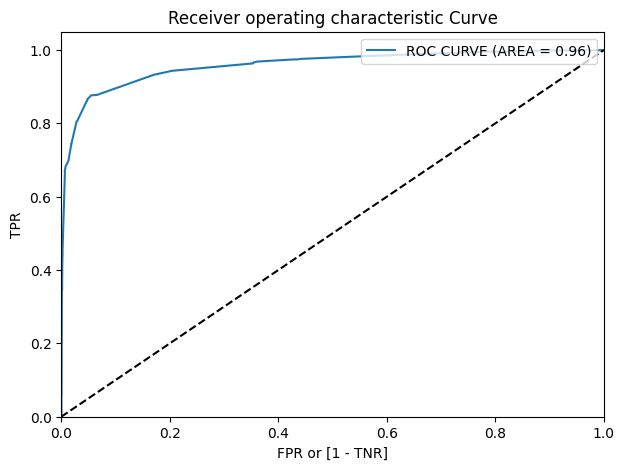

In [ ]:
#Plot the ROC Curve
ROC_PLOT(y_train_pred_final['Converted'], y_train_pred_final['y_train_pred_prob'])

The ROC Area is very good 0.96 (very close to 1)

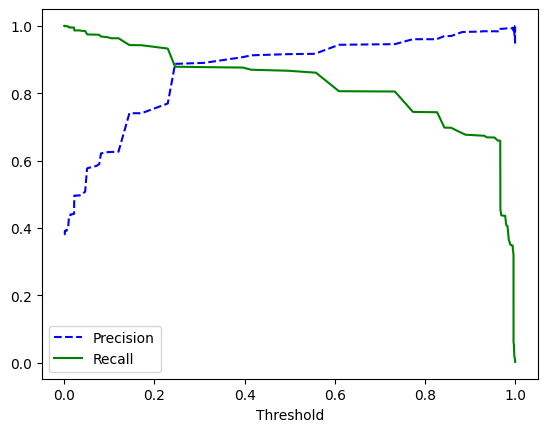

In [ ]:
# Precision - Recall Curve
precision, recall, thresholds = metrics.precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['y_train_pred_prob'])
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.show()

In [ ]:
#Adding columns to y_train_pred_final for different cut-offs
cut_offs = [0.2,0.3, 0.4, 0.5, 0.6]
for cutoff in cut_offs:
  y_train_pred_final[cutoff] = np.where(y_train_pred_final['y_train_pred_prob'] > cutoff, 1, 0)
y_train_pred_final.head()

,Lead Number,Converted,y_train_pred_prob,Lead_Score,y_train_pred,0.2,0.3,0.4,0.5,0.6
477,655323,0,0.171351,17.0,0,0,0,0,0,0
3956,622172,0,0.021942,2.0,0,0,0,0,0,0
1913,641106,1,0.733257,73.0,1,1,1,1,1,1
2178,638862,0,0.171351,17.0,0,0,0,0,0,0
1730,642522,1,0.826874,83.0,1,1,1,1,1,1


In [ ]:
#Creating DF, capturing Accuracy, Sensitivity and Specificity for above cut offs
metrics_df = pd.DataFrame(columns=['Cutoff','Accuracy','Sensitivity','Specificity'])
for cutoff in cut_offs:
  cnf_mtrx = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[cutoff])
  TP = cnf_mtrx[1,1]
  TN = cnf_mtrx[0,0]
  FP = cnf_mtrx[0,1]
  FN = cnf_mtrx[1,0]
  row = pd.DataFrame({'Cutoff':cutoff,
                                  'Accuracy':metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final[cutoff]),
                                  'Sensitivity':TP/(TP+FN),
                                  'Specificity':TN/(TN+FP)},index=[0])
  metrics_df = pd.concat([metrics_df,row])
metrics_df

,Cutoff,Accuracy,Sensitivity,Specificity
0,0.2,0.868391,0.932817,0.828888
0,0.3,0.912424,0.877692,0.933721
0,0.4,0.918972,0.869940,0.949036
0,0.5,0.917826,0.861757,0.952205
0,0.6,0.908168,0.806202,0.970689


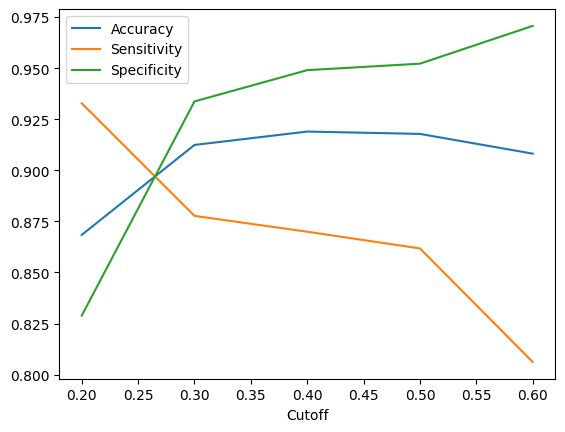

In [ ]:
#Plotting the above graph
metrics_df.plot(x='Cutoff', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

**Here ~ 0.3 seems to be an optimum cut off.**

In [ ]:
y_train_pred_final['final_predicted'] = np.where(y_train_pred_final['y_train_pred_prob'] > 0.3, 1, 0)
y_train_pred_final.head()

,Lead Number,Converted,y_train_pred_prob,Lead_Score,y_train_pred,0.2,0.3,0.4,0.5,0.6,final_predicted
477,655323,0,0.171351,17.0,0,0,0,0,0,0,0
3956,622172,0,0.021942,2.0,0,0,0,0,0,0,0
1913,641106,1,0.733257,73.0,1,1,1,1,1,1,1
2178,638862,0,0.171351,17.0,0,0,0,0,0,0,0
1730,642522,1,0.826874,83.0,1,1,1,1,1,1,1


In [ ]:
# Model Metrics for 0.3 cut-off
conf_mtrx_fin = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

In [ ]:
#Accuracy - 0.3 cut off
print('Accuracy:',metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']))
TP = conf_mtrx_fin[1,1]
TN = conf_mtrx_fin[0,0]
FP = conf_mtrx_fin[0,1]
FN = conf_mtrx_fin[1,0]
#Sensitivity - 0.3 cut off
print('Sensitivity:',TP/(TP+FN))
#Specificity - 0.3 cut off
print('Specificity:',TN/(TN+FP))
#Precision - 0.3 cut off
print('Precision:',TP/(TP+FP))
#Recall - 0.3 cut off
print('Recall:',TP/(TP+FN))

Accuracy: 0.9124242920281552
Sensitivity: 0.8776916451335056
Specificity: 0.9337206231845788
Precision: 0.8903451288772389
Recall: 0.8776916451335056


These metrics indicate that the classification model is performing quite well. Let's break down what each of these metrics means in terms of the model's "goodness":

1. **Accuracy (0.9124)**: This means the model is correctly predicting 91.24% of the instances. High accuracy is generally good, but it should be considered along with other metrics to ensure it's not misleading, especially if the data is imbalanced.

2. **Sensitivity (Recall) (0.8777)**: Sensitivity or recall is the model's ability to correctly identify positive instances. A value of 0.8777 means the model is correctly identifying 87.77% of the true positive cases. This is important in applications where detecting positive instances is crucial, such as medical diagnosis.

3. **Specificity (0.9337)**: Specificity is the model's ability to correctly identify negative instances. A value of 0.9337 means the model is correctly identifying 93.37% of the true negative cases. This is important in applications where avoiding false positives is crucial.

4. **Precision (0.8903)**: Precision is the model's ability to accurately predict positive instances out of all predicted positives. A value of 0.8903 means that 89.03% of the predicted positive instances are actually true positives. This is important when the cost of false positives is high.

5. **Recall (0.8777)**: Recall is the same as sensitivity, and it's the ability to correctly identify positive instances. **This is also the business goal : "The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%."** So our metric is above the threshold and is a solid ~88%

Overall, these metrics suggest that our model is performing well, with high accuracy, sensitivity, specificity, precision but more importantly the **"Recall"**. This means the model is effective at correctly identifying both positive and negative instances, which is indicative of a robust and reliable classification model.

###**Test Set Prediction**

In [ ]:
#Features used for the final model
X_train_iter_3.columns

Index(['Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_not provided',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [ ]:
#Dropping features in the test dataset based on above
X_test = X_test[X_train_iter_3.columns]
X_test.shape

(2619, 12)

In [ ]:
X_test_sm = sm.add_constant(X_test)
X_test_sm


,const,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,What matters most to you in choosing a course_not provided,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3350,1.0,0,0,1,0,0,0,0,0,0,0,0,0
2028,1.0,0,0,0,0,0,0,0,0,0,0,1,0
681,1.0,0,0,0,1,0,0,0,0,0,0,0,0
3118,1.0,0,0,1,1,0,0,0,0,0,0,0,0
2893,1.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5727,1.0,0,0,1,1,0,0,0,0,0,0,1,0
2911,1.0,0,0,0,1,0,0,0,0,0,0,0,0
5596,1.0,0,0,0,0,0,0,0,1,0,0,0,0
7746,1.0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_test_pred = final_model.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'y_test_pred_prob':y_test_pred})
#Calculating lead score based on conversion probability
y_test_pred_final['Lead_Score'] = (100*(y_test_pred_final['y_test_pred_prob'])).round(0)
#Final prediction based on 0.3 cut - off
y_test_pred_final['final_predicted']= np.where(y_test_pred_final['y_test_pred_prob'] > 0.3, 1, 0)
#Merging back the Lead numbers
y_test_pred_final = pd.concat([X_test_LeadId, y_test_pred_final], axis=1)
y_test_pred_final.head()

,Lead Number,Converted,y_test_pred_prob,Lead_Score,final_predicted
3350,628048,1,0.733257,73.0,1
2028,640067,0,0.046562,5.0,0
681,653527,0,0.120495,12.0,0
3118,629969,0,0.558069,56.0,1
2893,631890,0,0.229724,23.0,0


In [ ]:
# Test set model metrics
test_conf_mtrx = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['final_predicted'])
test_conf_mtrx

array([[1532,  105],
       [ 111,  871]])

In [ ]:
TP=test_conf_mtrx[1,1]
TN=test_conf_mtrx[0,0]
FP=test_conf_mtrx[0,1]
FN=test_conf_mtrx[1,0]
print('Accuracy : ',metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final['final_predicted']))
print('Sensitivity : ',TP/(TP+FN))
print('Specificity : ',TN/(TN+FP))
print('Precision : ',TP/(TP+FP))
print('Recall : ',TP/(TP+FN))

Accuracy :  0.9175257731958762
Sensitivity :  0.8869653767820774
Specificity :  0.9358582773365913
Precision :  0.8924180327868853
Recall :  0.8869653767820774


On the train set we had 91% accuracy, 88% sensitivity and 93% specificity.

The model evaluation metrics for test set are almost identical to the model evaluation metrics on the train set. This means that our model generalizes very well over the data and is fit for use for scoring the leads.

**Again here the Recall metric of the model on the test set is ~89% which is in line with the business goal.**

###**Model Insights**
Tags seems to be a really important featuture as it has the top 3 positive coefficients within the model.

•	**Tags_Closed by Horizzon (coef: 7.0758)**

•	**Tags_Lost to EINS (coef: 6.4033)**

•	**Tags_Will revert after reading the email (coef: 4.5829)**

The above three features should be considered as the most influential in predicting lead conversion.

The odds of conversion are also pretty high when lead source is "Welingak Website" and the last activity is "sms sent".

People do not like invasive followup, hence people with Do not email set to Yes negatively impacts conversion.

Also it seems to be a waste of time to followup on leads that have ringing or switched off as tags, possible indicating that the contact details are stale.